In [1]:
%matplotlib notebook

from matplotlib.pylab import *
from numpy import *


<hr style="border-width:4px; border-color:coral"></hr>

# Homework #7


<hr style="border-width:4px; border-color:coral"></hr>


<hr style="border-width:4px; border-color:black"></hr>

## Problem #1 (TB 11.2, page 

<hr style="border-width:4px; border-color:black"></hr>

Find the best-fit coefficients $\mathbf c = (c_0, c_1, c_2)$ so that

\begin{equation}
g(x) = c_0 e^x + c_1 \sin(x) + c_2 \Gamma(x)"
\end{equation}

approximates the function $f(x) = 1/x$ as closely as possible.  To find $\mathbf c$, find $\overline{\mathbf c}$ that minimizes the function 

\begin{equation}
\mathbf F\mathbf (c) = \Vert f(\mathbf x) - g(\mathbf x) \Vert_2^2
\end{equation}

over an interval $x \in [a,b]$.  

#### Task

We solve this problem by discretizing the interval $[a,b]$ using discrete nodes $\mathbf x = \left[x_0, x_1, \dots x_{m-1}\right]$.  We then solve the system of equations

\begin{equation}
c_0 e^{x_i} + c_1 \sin(x_i) + c_2 \Gamma(x_i) = f(x_i), \qquad i = 0,1,\dots m-1
\end{equation}

This will in general be an overdetermined system that can be expressed as the linear system

\begin{equation}
A\mathbf c = \mathbf F
\end{equation}

where $A \in \mathbb R^{m \times 3}$ and $\mathbf F \in \mathbb R^{m \times 1}$.  

* Solve this resulting linear system using Algorithm 11.2 in TB (page 83).  
* Choose $m$ so that the relative norm satisfies

\begin{equation}
\frac{\Vert \mathbf f - \mathbf g \Vert_2}{\Vert \mathbf f\Vert_2} \le 10^{-2}
\end{equation}

where vectors $\mathbf f$ and $\mathbf g$ are defined as $\mathbf f = f(\mathbf x)$ and $\mathbf g = g(\mathbf x)$.  Your value of $m$ should not be very large.   

* Display the coefficients $\mathbf c = (c_0, c_1, c_2)$ you obtain for each interval $(a,b)$. 

* Plot the function $f(x)$ and your approximation $g(x)$ on the same graph.   

#### Hints

* Use `linspace` to construct discrete points $x_i, i = 0,1,\dots m-1$. 

* Use the SciPy function `scipy.special.gamma` to get the function $\Gamma(x)$. 

* Use the QR function provided below. 

* For the interval (0,1), you can use an interval $(\varepsilon,1)$, where $\varepsilon \ll 1$. 

* Use the notebook "Hmwk7_exact" to compare the coefficients you get to the exact solution computed using SymPy. 

In [2]:
def display_mat(msg,A):
    print(msg)
    fstr = {'float' : "{:>16.8f}".format}
    with printoptions(formatter=fstr):
        display(A)
    print("")        

In [3]:
# Use this QR algorithm, or you may use your own from Homework #6

def QR_House(A):
    m,n = A.shape

    R = A.copy()
    Qt = eye(m)
    p = min([m,n])
    for j in range(p):
        x = R[j:m,j:j+1]
        I = eye(m-j)    
        s = 1 if x[0] >= 0 else -1     # sign function, with sign(0)  = 1
        v = s*linalg.norm(x,2)*I[:,0:1] + x
        v = v/linalg.norm(v,2)
        F = I - 2*(v@v.T)
        R[j:m,j:n] = F@R[j:m,j:n]
        Qt[j:m,:] = F@Qt[j:m,:]   # Solution to Homework #6 !!!
        
    Qt = Qt.T
    return Qt, R

In [4]:
from scipy.special import gamma

def f(x):
    return 1/x

def g(c,x):
    return c[0]*exp(x)+c[1]*sin(x)+c[2]*gamma(x)



In [5]:
a=1
b=2
# m=150

x = reshape(linspace(a,b,m),(m,1))
A = zeros((m,3))
   
        
V[:,0:1] = exp(x)
V[:,1:2] = sin(x)
V[:,2:3] = gamma(x)

# Q,R = QR_House(V)

# p   = linalg.matrix_rank(V)
# F = f(x)
# f1 = Q.T@F
# c = linalg.inv(R[0:p,0:p])@Q[:,0:p].T@F
# #c = linalg.lstsq(R,f1,rcond=None)[0]
    
# G = g(c,x)


### Problem 1a

<hr style="border-width:2px; border-color:black"></hr>

Compute the coefficients $\mathbf c$ for the interval $(a,b)$. 

In [13]:
def fn(a,b,m):
    x = reshape(linspace(a,b,m),(m,1))
    
    V = zeros((m,3))
    for i in range(0,m):
        V[i:,0:1] = exp(x[i])
        V[i:,1:2] = sin(x[i])
        V[i:,2:3] = gamma(x[i])
      
    Q,R = QR_House(V) 
    p   = linalg.matrix_rank(V)
    F = f(x)
    f1 = Q.T@F
   
    
    #c = linalg.inv(R[0:p,0:p])@Q[:,0:p].T@F
    c = linalg.lstsq(R,f1,rcond=None)[0]
    G = g(c,x)
    return x,c,p,F,G
a=1
b=2
m=50
x,c,p,F,G= fn(a,b,m)

c


array([[-0.10774242],
       [ 0.00959252],
       [ 1.28659552]])

<IPython.core.display.Javascript object>


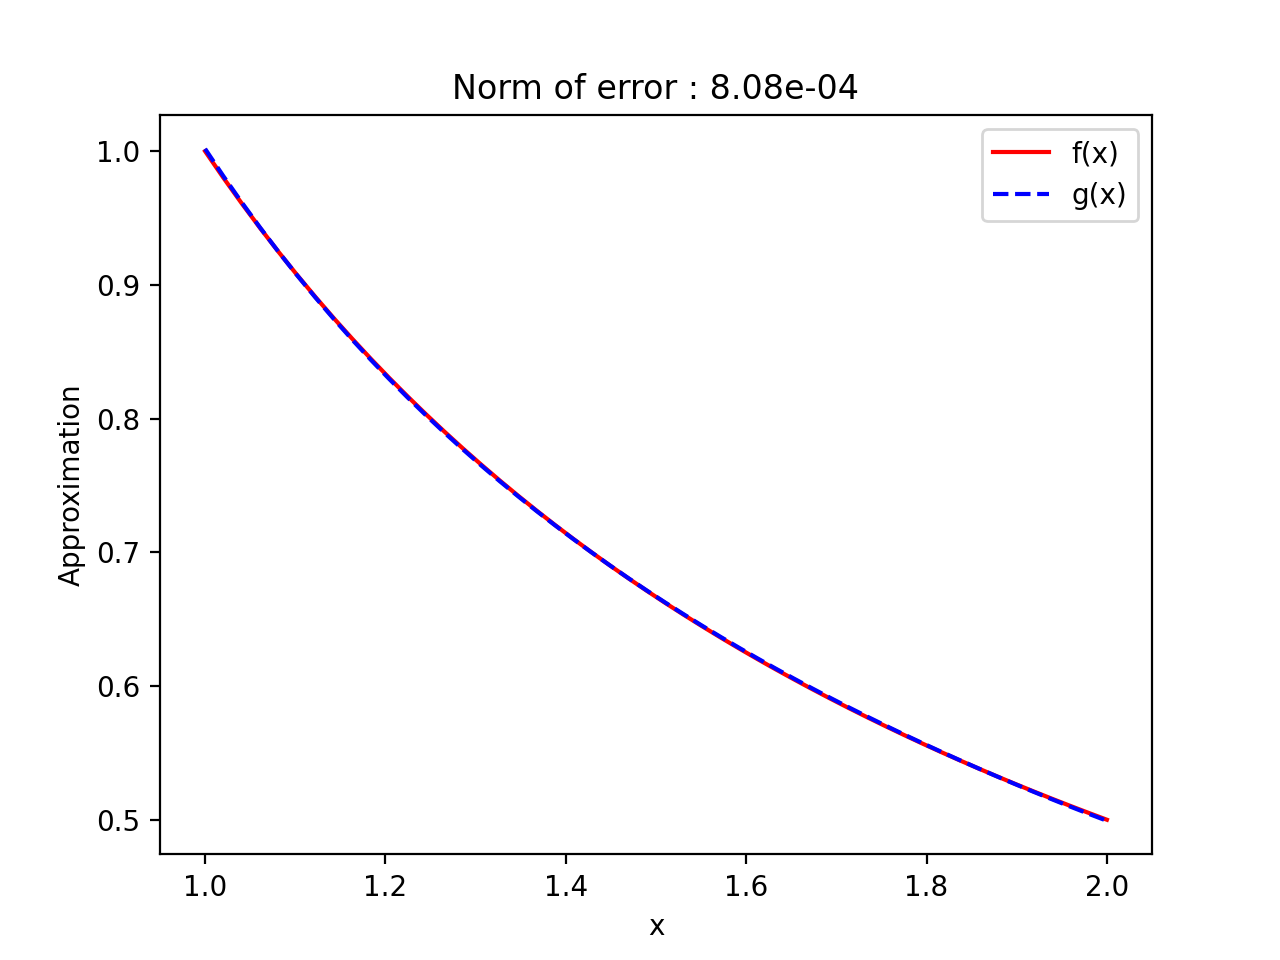

In [7]:
figure(1)
clf()



plot(x,F,'r',label='f(x)')
plot(x,G,'b--',label='g(x)')     



rel_norm = linalg.norm(G-F,2)/ linalg.norm(F,2)   
  
str = "Norm of error : {:.2e}".format(rel_norm)   
xlabel('x')
ylabel('Approximation')
title(str)

legend()

show()

### Problem 1b

<hr style="border-width:2px; border-color:black"></hr>

Compute the coefficients $\mathbf c$ for the interval $(0,1)$. 

#### Question : 

Is there one function used to define $g(x)$ that seems to be the closest match to $f(x)$? 

<IPython.core.display.Javascript object>


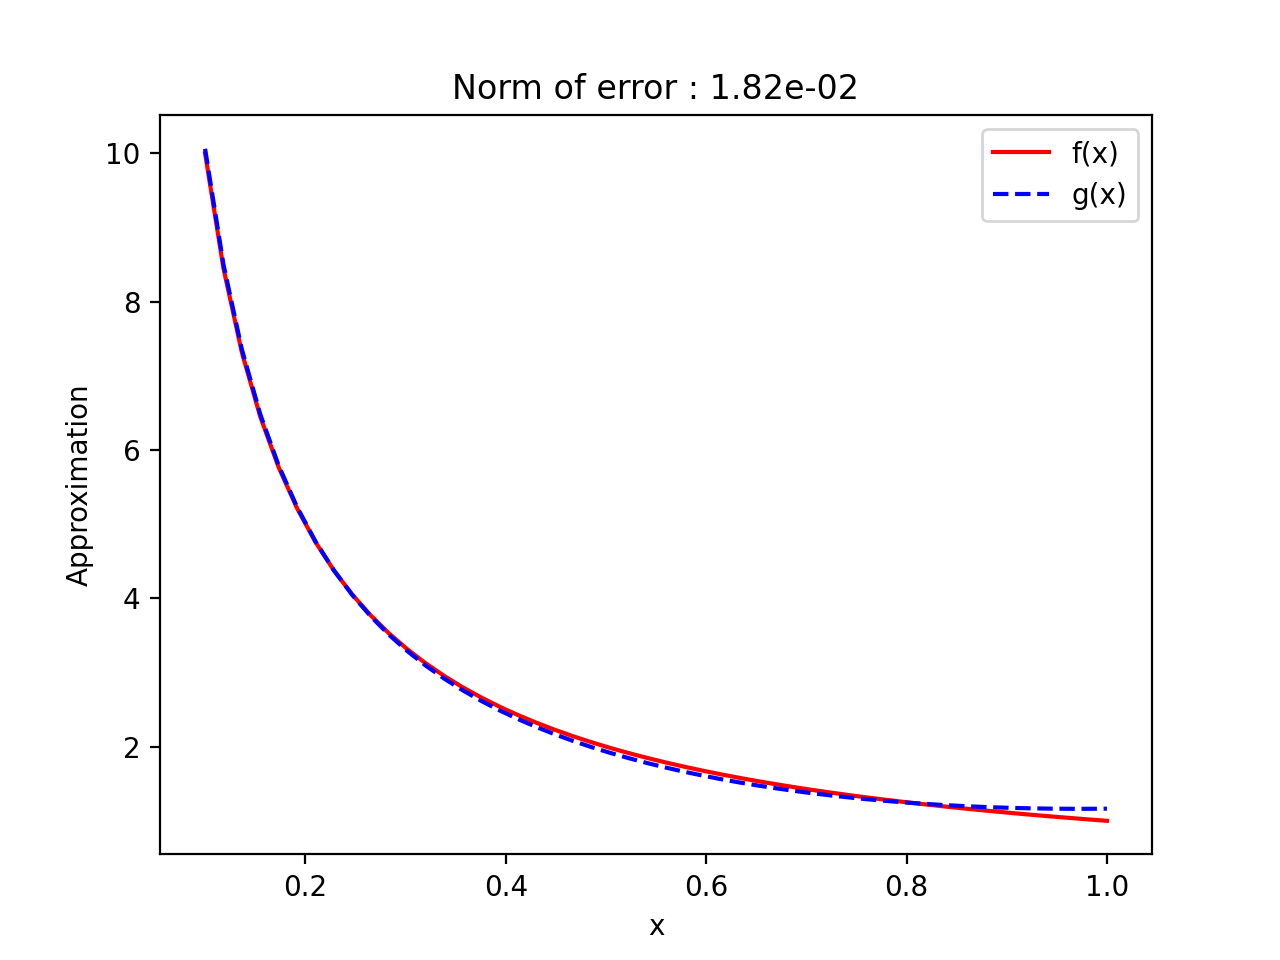

In [12]:
# Repeat the above for interval (0,1)
figure(2)
a1=0.1
b1=1
m1=50
x1,c1,p1,F1,G1= fn(a1,b1,m1)





plot(x1,F1,'r',label='f(x)')
plot(x1,G1,'b--',label='g(x)')     



rel_norm = linalg.norm(G1-F1,2)/ linalg.norm(F1,2)     #  Compute relative norm here
str = "Norm of error : {:.2e}".format(rel_norm)   
xlabel('x')
ylabel('Approximation')
title(str)

legend()

show()

In [11]:
c1

array([[ 0.63895196],
       [-1.87311681],
       [ 1.00291161]])